# Building a basic app

::::: {.grid}

:::: {.g-col-6}

::: {.callout-note appearance="minimal"}
## Lecture learning goals

1. Motivate the need to use a dashboard framework
2. Distinguish server side from client side interactivity
3. Understand the pros and cons with Dash and Shiny
4. Identify how a Dash/Shiny app is designed conceptually
5. Run a Dash/Shiny app on a local server
6. Create input widgets (dropdowns, sliders, etc)
7. Set up callbacks that update the app based on user input

:::
    
::::

:::: {.g-col-6}

::: {.callout-note appearance="minimal"}
## Required activities

- There are several optional readings linked throughout these notes where you can learn more about Dash and Shiny.

*You can read these either before or after class*               

:::

::::

:::::

**Lecture slides**

![](slides-lec2.pdf#zoom=75&&navpanes=0&statusbar=0&messages=0&pagemode=none){width=100% height=440px}

Some of these sections have been copied and modified from [the dash documentation](https://dash.plotly.com/).

We're going to explain the basic logic of the dashboard before we start working with data.
This is because it can get a little messy to keep track of the overall app structure
when we have big chunks of data wrangling etc,
so we're starting out with short toy examples.

## Dashboard basics

### Dash

Let's explore the very minimal requirements for a Dash app.

```python
from dash import Dash, html


# Initiatlize the app
app = Dash()

# Layout
app.layout = html.Div('I am alive')

# Server side callbacks/reactivity
# ...

# Run the app/dashboard
app.run()
```

If we save this as a file called `app.py`,
we can run it by typing `python app.py`.
This will serve a web page locally,
which you can view by navigating to the address `http://127.0.0.1:8050/`
in your browser,
which should look like this:

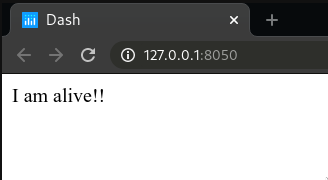

Congratulations,
you're now a dashboard developer!
However,
I would probably wait until after milestone 4
before you can comfortably put that line on your resume =)

Although the above is a functioning app,
there are a few more lines that we should add to our minimal skeleton.

```python
from dash import Dash, html


# Initiatlize the app
app = Dash(__name__)

# Layout
app.layout = html.Div('I am alive')

# Server side callbacks/reactivity
# ...

# Run the app/dashboard
if __name__ == '__main__':
    app.run(debug=True)
```

`__name__` is an automatically created variable in Python
that holds the name of the currently running module.
This is `'__main__'` if we run the script directly with `python app.py`
and otherwise it is the name of the module.

Passing `__name__` to `Dash()` is conventions
and sets the name of the Flask instance.
The last if statement is a check to make sure that `app.py` is being run as the main script and not imported from anothe rscript.
You can learn more about these concept in the material from 522 and 511.

Adding `debug=True` makes sure that we capture any debugging output
and the app stops if we run into an error.
It also enable "hot reloading" / "autoreload",
which means that as you make changes to the source file,
the dash/flask server will automatically detect that the source file have changed
and update the app,
without you having to relaunch it
(and usually without manually refreshing the browser).
This is very convenient for quick iteration.

### Shiny

See https://mastering-shiny.org/basic-app.html for how to work with Shiny in R Studio.
This is the equivalent of the Dash app above.

```r
# If you want the same port each time and enable hot reloading
# options(shiny.port = 8050, shiny.autoreload = TRUE)

library(shiny)


# No explicit initiatlization in Shiny

# Layout
ui <- fluidPage('I am alive')

# Server side callbacks/reactivity
server <- function(input, output, session) {}

# Run the app/dashboard
shinyApp(ui, server)
```

## Configuring the app layout


### Dash

The layout in the dash app is a list of dash components laid out vertically.
The Dash web application framework provides pure Python abstraction around HTML, CSS, and JavaScript.
That means that instead of writing HTML or using an HTML templating engine,
you compose your layout using Python structures with the `dash-html-components` library.

```python
app.layout = html.Div([
    html.H1('Hello Dash'),
    html.P('Dash converts Python classes into HTML'),
    html.P("This conversion happens behind the scenes by Dash's JavaScript front-end")
])
```

which get converted into the following HTML (as you can see if you right-click and inspect the HTML of your app):

```html
<div>
    <h1>Hello Dash</h1>
    <p>Dash converts Python classes into HTML</p>
    <p>This conversion happens behind the scenes by Dash's JavaScript front-end</p>
</div>
```

With this change, our app now looks like this.

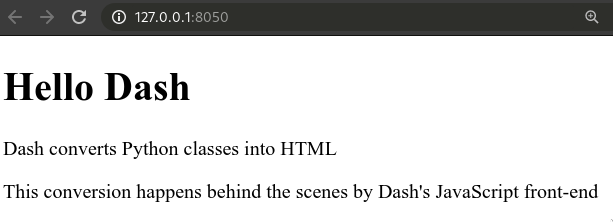

You can achieve the same layout by using the markdown component,
but note that it might be easier to style individual Divs than Markdown components (this is a minor point; e.g. if you want the title to look difference from the text)

```python
from dash import dcc

app.layout = dcc.Markdown('''
    # Hello Dash

    Dash converts Python classes into HTML

    This conversion happens behind the scenes by Dash's JavaScript front-end
''')
```

If you don't want your app to look like it is from the early 90s,
you can style your app with CSS.
While it is possible to write your own,
it is much easier to use a pre-made stylesheet
by changing the initialization of your app to
use the `dash_bootstrap_components` library.

```python
import dash_bootstrap_components as dbc

app = Dash(__name__, external_stylesheets=[dbc.themes.BOOTSTRAP])

# The change to `dbc.Container` adds padding on the sides
# which prevents the text from going all the way to the edge of the screen
# You can always use it as the top level container instead of `html.Div`
app.layout = dbc.Container([
    html.H1('Hello Dash'),
    html.P('Dash converts Python classes into HTML'),
    html.P("This conversion happens behind the scenes by Dash's JavaScript front-end")
])
```

which fastforwads the looks of the app a couple of decades:

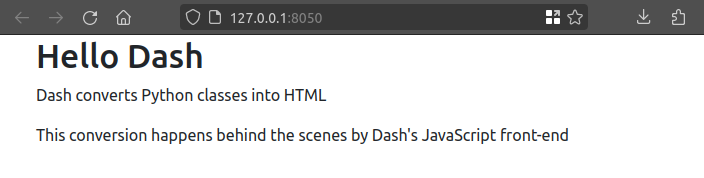

A preview of the available themes can be found at https://bootswatch.com/default. Let's try `dbc.themes.DARKLY`.

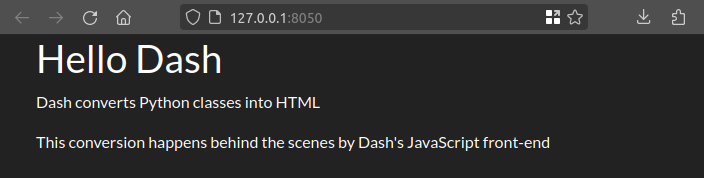

Further styling is optional and should only be done after more important parts of your dashboard are taken care of.
We will cover this in some more detail later in this class.

### Shiny

Since there is no separate initialization step in shiny,
the theme is set inside the `fluidPage` function.
The default light theme already looks quite modern,
and if you want to try theother themes,
you have the same options as in dash.

```r
ui <- fluidPage(
    theme = bslib::bs_theme(bootswatch = 'darkly'),
    h1("Hello Shiny"),
    p('Shiny converts R classes into HTML'),
    p("This conversion happens behind the scenes by Dash's JavaScript front-end"),
)
```

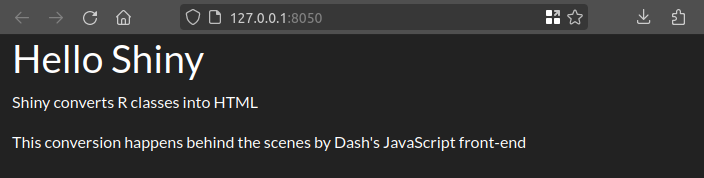

## Receiving input from widgets

### Dash

The core components (or widgets) of dash
are those that enable you to create interactive user interfaces:
dropdowns, sliders, checkboxes, etc.
We will not go through all of these,
but cover to of the main ones so that you grok
how they work in general.
The dash documentation is an excellent source 
for finding [additional parameters and components,
such as text input, buttons, and date pickers](https://dash.plotly.com/dash-core-components).

#### Sliders for numerical values

```python
from dash import Dash, html, dcc
import dash_bootstrap_components as dbc

# Initiatlize the app
app = Dash(__name__, external_stylesheets=[dbc.themes.BOOTSTRAP])

# Layout
app.layout = dbc.Container([
    html.Label('My first slider'),  # A label for the slider
    dcc.Slider(min=0, max=5, value=2),
])

# Server side callbacks/reactivity
# ...

# Run the app/dashboard
if __name__ == '__main__':
    app.run(debug=True)
```

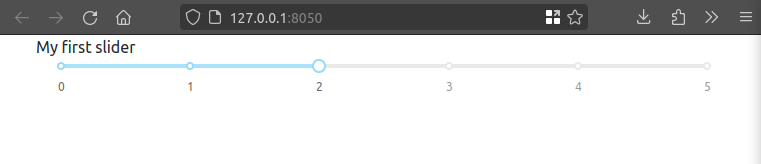

There is also the range slider for selecting a range of value instead of just one.
To have more components in the app,
we keep appending them to the list in the container:

```python
app.layout = dbc.Container([
    html.Label('My first slider'),
    dcc.Slider(min=0, max=5, value=2),
    html.Br(),  # Add whitespace; br = "break"
    html.Label('My first range slider'),
    dcc.RangeSlider(
        min=0,
        max=5,
        value=[1, 3],  # A list since it's a range slideer
        step=1,  # The step between values
        marks={0: '0', 5: '5'},  # The marks/labels on the slider
        tooltip={'always_visible': True, 'placement': 'bottom'}  # Show the current values
    )
])

```
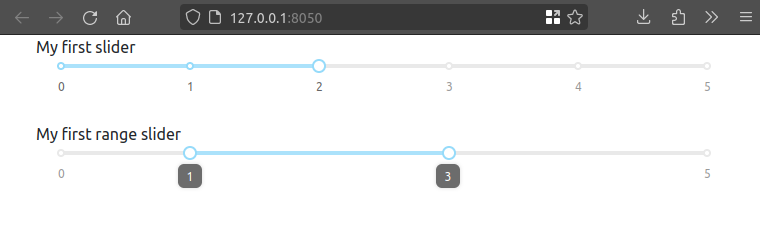

#### Dropdowns for categorical values

Dropdowns are searchable and select a single value by default.

```python
app.layout = dbc.Container([
    html.Label('Dropdown'),
    dcc.Dropdown(
        options=['New York City', 'Montreal', 'San Francisco'],
        value='Montreal',
    )
])
```

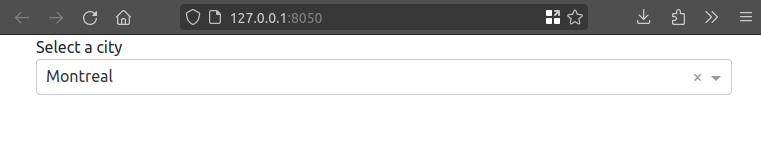

But can be changed to allow selection of multiple values.

```python
app.layout = dbc.Container([
    html.Label('Select a city'),
    dcc.Dropdown(
        options=['New York City', 'Montreal', 'San Francisco'],
        value='Montreal',
    ),
    html.Br(),
    # A widget with a self-explanatory placeholder does not need a label
    dcc.Dropdown(
        options=['New York City', 'Montreal', 'San Francisco'],
        multi=True,
        placeholder='Select multiple cities...'
    )
])
```
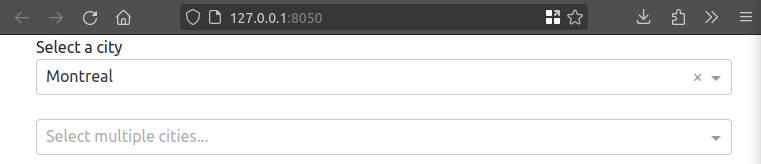

There are also checkboxes for multiple categorical values and radio buttons for single ones
that work similarly, check out the docs for all the options.

### Shiny

See https://mastering-shiny.org/basic-ui.html for more details.

```r
options(shiny.port = 8050, shiny.autoreload = TRUE)

library(shiny)

# Layout
ui <- fluidPage(
    # Note that we have to set an `id` and `label` for each widget
    # via the two first positional arguments
    sliderInput("slider_id", "Slider Label", min = 0, max = 5, value = 2),
    br(),  # Whitespace
    # Note that the range slider is created with the same function 
    # and it detects that it should be a range slider via the `value` parameter
    sliderInput(
        "range_slider_id",
        "A range slider",
        min = 0,
        max = 5,
        value = c(1, 3),
        step = 0.1,
        ticks = FALSE
    )
)

# Server side callbacks/reactivity
server <- function(input, output, session) {}

# Run the app/dashboard
shinyApp(ui, server)
```

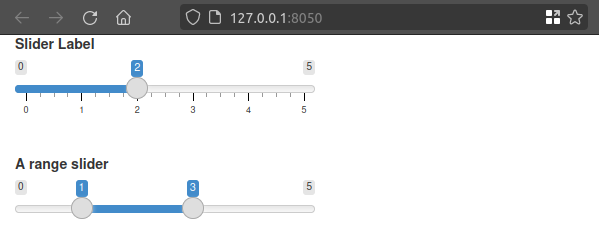

```r
ui <- fluidPage(
    selectInput(
        "city",
        "Select a city",
        choices = c("New York", "Montreal", "San Fransico"),
        selected = "Montreal",
    ),
    br(),
    # selectizeInput allows the use of placeholder text
    # although it's a bit convoluted
    selectizeInput(
        "city_multi",
        "",
        choices = c("New York", "Montreal", "San Fransico"),
        multi=TRUE,
        options = list(
            placeholder = 'Select multiple cities',
            onInitialize = I('function() { this.setValue(""); }')
        )
    )
)
```

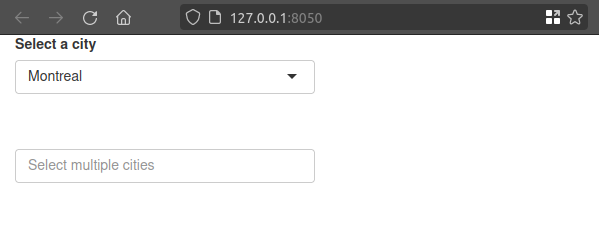

## Taking action via callbacks

### Dash

So far we have seen how to layout our app
and how to receive input from the person using it.
But how can our app be updated after this input is received?
For this,
we need to "call back" to some function
with the updated values after a widget has been changed.
Dash callback functions are simply Python functions
that are automatically called by Dash whenever an input component's property changes.

The simplest such callback function
would do nothing else than returning the value of the input widget
and could look like this:

```python
def update_output(input_value):
    return input_value
```

But how do we link this function to a Dash widget
such as a dropdown or text input?
First,
we must define names/IDs for the html components
that will hold the input and output values.
Here,
we use a text input area (`dcc.Input`) to write text in,
and a div (`html.Div`) to display the written text.

```python
app.layout = dbc.Container([
    dcc.Input(id='input_widget'),
    html.Div(id='output_area')
])
```
Next,
we need to link the input widget to the output area.
Specifically,
we want to link the `value` property of the input widget
to the `children` property of the output area.
`children` is weird name
and just refers to all the content inside the div.
To link the two together,
we can use a special decorator function that Dash provides.
You learned about decorator functions in 511,
but as a quick recap,
you can think of it as a function that modifies another function.
In this case,
the modification is that it links two functions together.
The Dash decorator function for callbacks is named `callback`
and if we add the decorator to our output function,
it would look like this:


```python
from dash import Input, Output, callback

@callback(
    Output('output_area', 'children'),
    Input('input_widget', 'value'))
def update_output(input_value):
    return input_value
```

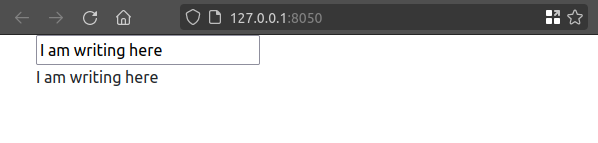

If we add labels, and some logic
the app looks neater and is more well-behaved
(see comments below for details):

```python
from dash import Dash, html, dcc, Input, Output, callback
import dash_bootstrap_components as dbc

# Initiatlize the app
app = Dash(__name__, external_stylesheets=[dbc.themes.BOOTSTRAP])

# Layout
app.layout = dbc.Container([
    html.Label('Input your mood:'),
    # dcc.Input needs to be inside html.Div to create a newline before and after
    html.Div(dcc.Input(id='input_widget')),  # You could set a default via `value=` as before
    html.Br(),
    html.Label('Output: '),
    html.Div(id='output_area')
])

# Server side callbacks/reactivity
@callback(
    Output('output_area', 'children'),
    Input('input_widget', 'value')
)
def update_output(input_value):
    # The if-clause is optional and prevents the function from running until some text is entered
    if input_value:
        # We can use an fstring to have some constant text in the output
        return f'You are {input_value}!'
    else:
        return None

# Run the app/dashboard
if __name__ == '__main__':
    app.run(debug=True)

```

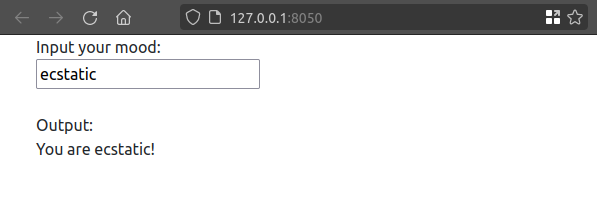

`dcc.Input` can be switched for a dropdown, slider, etc;
most of them have a `value` property that can be used in the callback
the same way as the `value` property of `dcc.Input` above.

### Shiny 

In Shiny,
the callbacks are less verbose by default
but the main idea is the same:
we're targeting the `output_area` component
and updating it with the value of the `input_widget` component
(but we don't need to specify the property of the component we're targeting like we did in Dash).

```r
options(shiny.port = 8050, shiny.autoreload = TRUE)

library(shiny)

# Layout
ui <- fluidPage(
    textInput("input_widget", ""),
    textOutput("output_area"),
)
# Server side callbacks/reactivity
server <- function(input, output, session) {
    output$output_area <- renderText({
        # Explicit returns are optional in R, but can improve code clarity
        return(input$input_widget)
    })
}

# Run the app/dashboard
shinyApp(ui, server)
```

The `renderText` function is a so called **reactive** function in Shiny.
We will cover this in more detail later in the course,
for now you can think of it as a function that is called whenever the input changes.
If we would not have used `renderText` here,
and instead something like this:

```r
server <- function(input, output, session) {
    output$output_area <- input$input_widget
}
```

You would get this error message:

```text
Can't access reactive value 'input_widget' outside of reactive consumer.
Do you need to wrap inside reactive() or observe()?
```

If we want to add some logic to the callback,
similar to what we did in the Dash app,
it might look like this:

```r
options(shiny.port = 8050, shiny.autoreload = TRUE)

library(shiny)

# Layout
ui <- fluidPage(
    textInput("input_widget", "Input your mood:"),
    br(),
    # There is no `label` param` for `textOutput` so we use `strong` to make a manual label
    strong('Output:'),
    textOutput("output_area"),
)
# Server side callbacks/reactivity
server <- function(input, output, session) {
    output$output_area <- renderText({
        if (input$input_widget == '') {
            return('')
        } else {
            return(paste0('Your are ', input$input_widget, '!'))
        }
    })
}

# Run the app/dashboard
shinyApp(ui, server)
```

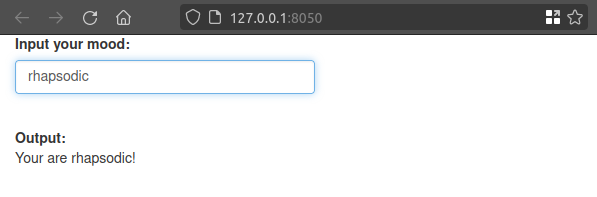